### Machine Learning for Engineers: [FeatureEngineering](https://www.apmonitor.com/pds/index.php/Main/FeatureEngineering)
- [Feature Engineering](https://www.apmonitor.com/pds/index.php/Main/FeatureEngineering)
 - Source Blocks: 9
 - Description: Feature engineering is the process of selecting and creating the input descriptors for machine learning.
- [Course Overview](https://apmonitor.com/pds)
- [Course Schedule](https://apmonitor.com/pds/index.php/Main/CourseSchedule)

<img width=500px align=left src='https://apmonitor.com/pds/uploads/Main/feature_engineering.png'>

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('http://apmonitor.com/pds/uploads/Main/tclab_data6.txt')
data['log_time'] = np.log(data['Time'].values)
data.head()

<ipython-input-1-340d6ab342a4>:4: RuntimeWarning: divide by zero encountered in log
  data['log_time'] = np.log(data['Time'].values)


,Time,Q1,Q2,T1,T2,log_time
0,0.0,0.0,0.0,16.06,16.00,-inf
1,1.0,0.0,0.0,16.06,15.97,0.000000
2,2.0,0.0,0.0,16.06,16.03,0.693147
3,3.0,0.0,0.0,16.03,16.00,1.098612
4,4.0,0.0,0.0,16.03,15.94,1.386294


<AxesSubplot:xlabel='Time'>

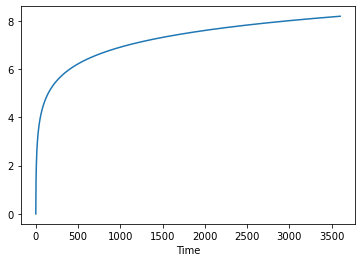

In [2]:
data.set_index('Time',inplace=True)
data['log_time'].plot()

<AxesSubplot:xlabel='Time', ylabel='Temperature (degC)'>

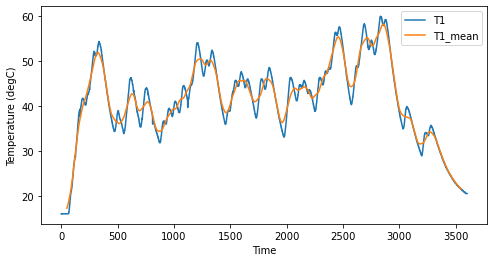

In [3]:
data['T1_mean']  = data['T1'].rolling(window=100,center=True).mean()
data['T1_stdev'] = data['T1'].rolling(window=100,center=True).std()
data['T1_skew']  = data['T1'].rolling(window=100,center=True).skew()
data[['T1','T1_mean']].plot(figsize=(8,4),ylabel='Temperature (degC)')

In [4]:
import pandas as pd
url = 'http://apmonitor.com/pds/uploads/Main/animals.txt'
data = pd.read_csv(url)
data.head()

,Weight,Color,Type
0,0.35,Gray,Cat
1,0.52,White,Dog
2,0.73,White,Dog
3,1.20,Orange,Cat
4,1.30,Gray,Cat


In [5]:
mapping = {'Cat': 0, 'Dog': 1}
data['Label'] = data['Type'].replace(mapping)

In [6]:
# Ordinal number encoding
data['CNumber'] = pd.factorize(data['Color'])[0]

In [7]:
data = data.join(pd.get_dummies(data['Color']))
data.head()

,Weight,Color,Type,Label,CNumber,Brown,Gray,Orange,Tan,White
0,0.35,Gray,Cat,0,0,0,1,0,0,0
1,0.52,White,Dog,1,1,0,0,0,0,1
2,0.73,White,Dog,1,1,0,0,0,0,1
3,1.20,Orange,Cat,0,2,0,0,1,0,0
4,1.30,Gray,Cat,0,0,0,1,0,0,0


   Weight   Color Type  Label  CNumber  Brown  Gray  Orange  Tan  White  \
0    0.35    Gray  Cat      0        0      0     1       0    0      0   
1    0.52   White  Dog      1        1      0     0       0    0      1   
2    0.73   White  Dog      1        1      0     0       0    0      1   
3    1.20  Orange  Cat      0        2      0     0       1    0      0   
4    1.30    Gray  Cat      0        0      0     1       0    0      0   

   Color_0  Color_1  
0      2.0      2.0  
1     -1.0     -2.0  
2     -1.0     -2.0  
3      0.0      2.0  
4      2.0      2.0  


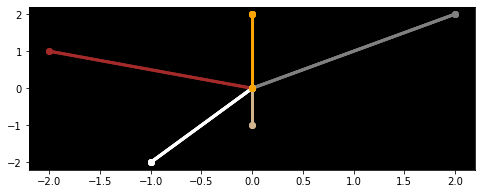

In [8]:
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(n_features=2, input_type='string')
ht = fh.fit_transform(data['Color']).toarray()
nc = pd.DataFrame(ht)
nc.columns = ['Color_'+str(i) for i in range(fh.n_features)]
data = data.join(nc)
print(data.head())

# create plot to show new features
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))
plt.rcParams['axes.facecolor'] = 'black'
for i in range(len(data)):
    plt.plot([0,data['Color_0'][i]],\
             [0,data['Color_1'][i]],\
             color=data['Color'][i],\
             marker='o',linestyle='-',lw=3)
plt.show()

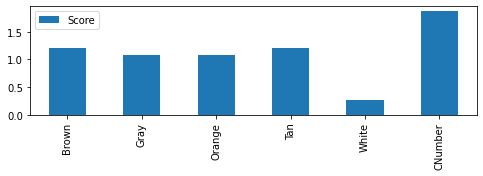

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'white'
bestfeatures = SelectKBest(score_func=chi2, k='all')
features = ['Brown','Gray','Orange','Tan','White','CNumber']
X = data[features]
y = data['Label']
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
scores = pd.concat([dfcolumns,dfscores],axis=1)
scores.columns = ['Specs','Score']
scores.index = features
scores.plot(kind='bar',figsize=(8,2))
plt.show()